In [1]:
%pip install -r requirements.txt
%pip uninstall -y tesserocr
%pip install --no-binary :all: tesserocr

Looking in indexes: https://pypi.org/simple, https://gitlab.com/api/v4/projects/48255673/packages/pypi/simple
Note: you may need to restart the kernel to use updated packages.
Found existing installation: tesserocr 2.7.1
Uninstalling tesserocr-2.7.1:
  Successfully uninstalled tesserocr-2.7.1
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: --no-binary currently disables reading from the cache of locally built wheels. In the future --no-binary will not influence the wheel cache. pip 23.1 will enforce this behaviour change. A possible replacement is to use the --no-cache-dir option. You can use the flag --use-feature=no-binary-enable-wheel-cache to test the upcoming behaviour. Discussion can be found at https://github.com/pypa/pip/issues/11453
  Using cached tesserocr-2.7.1.tar.gz (71 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ..

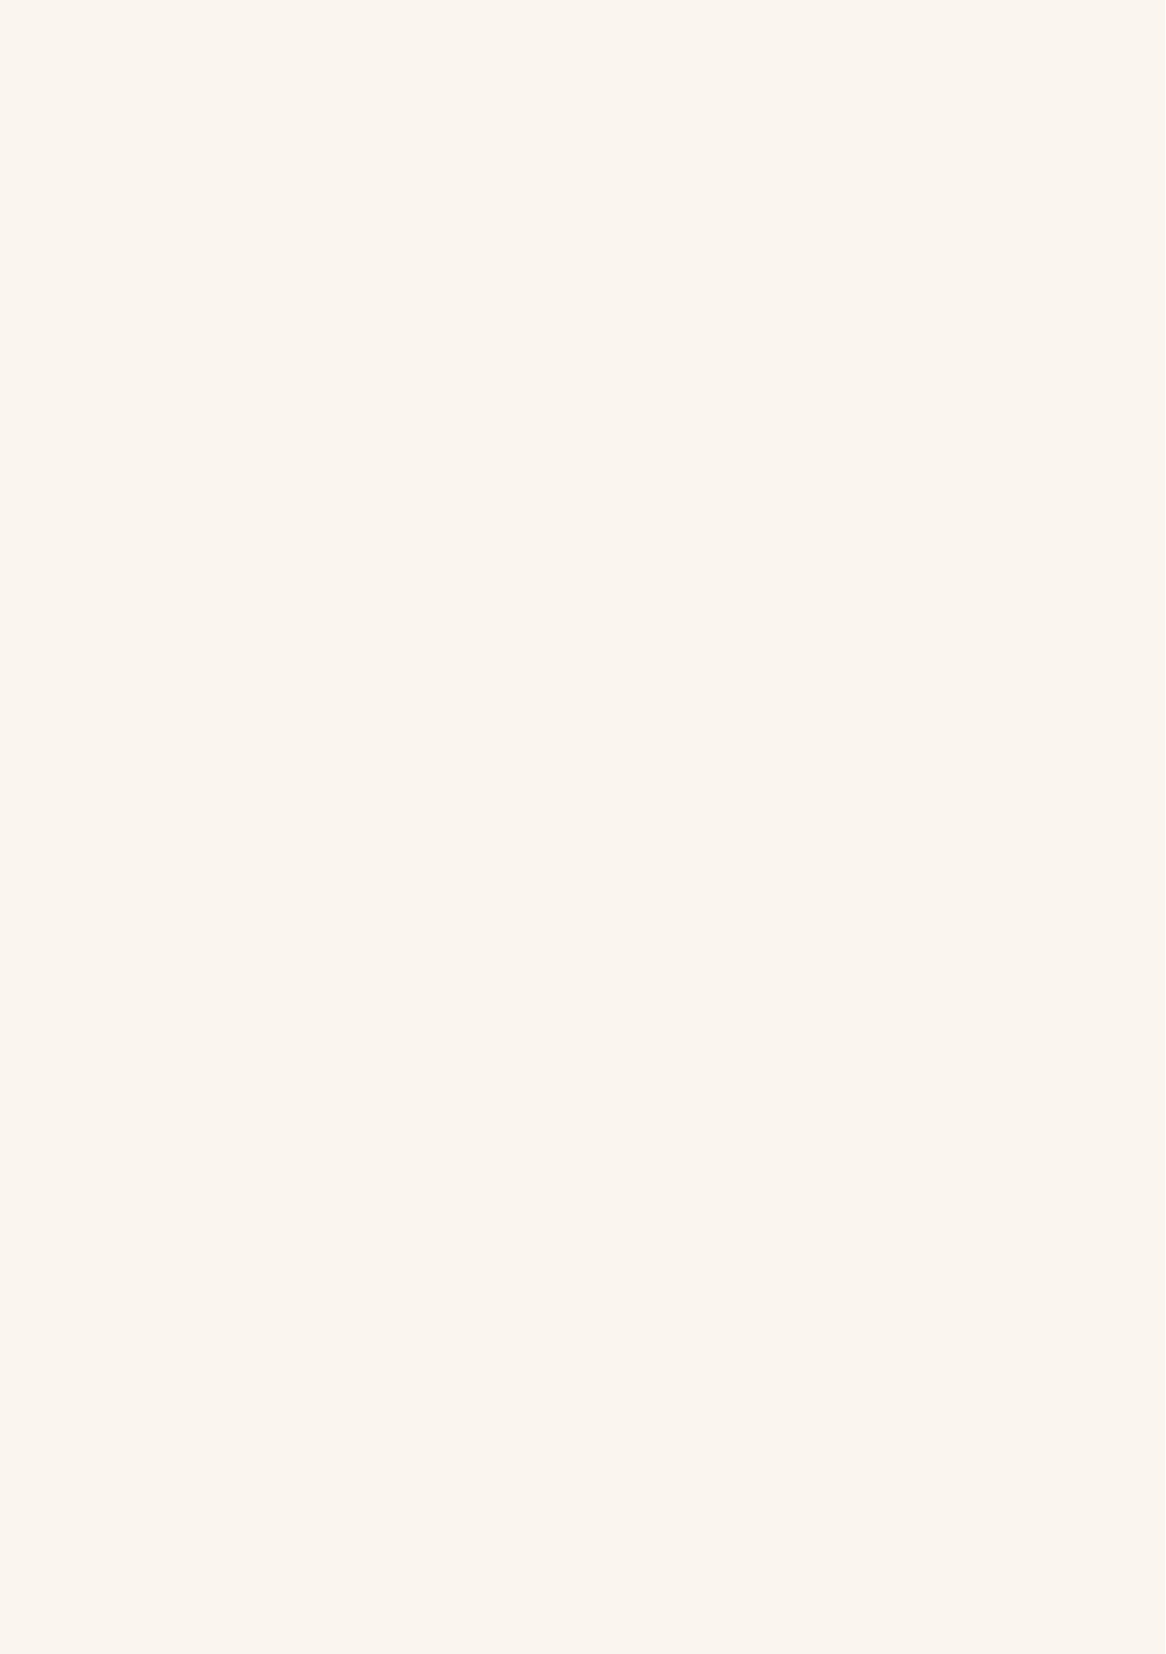

In [ ]:
from PIL import Image, ImageDraw
from parse import parse

image = Image.open("test/test3.jpg")
image_width, image_height = image.size

content, mean_confidence = parse(image)

draw = ImageDraw.Draw(image)

for item in content:
    bbox = item.get("bbox")
    draw.rectangle(
        [
            (int(bbox.get("left") * image_width), int(bbox.get("top") * image_height)),
            (
                int(bbox.get("right") * image_width),
                int(bbox.get("bottom") * image_height),
            ),
        ],
        outline="red",
    )

    for child in item.get('children') or []:
        child_bbox = child.get('bbox')
        draw.rectangle(
        [
            (int(child_bbox.get("left") * image_width), int(child_bbox.get("top") * image_height)),
            (
                int(child_bbox.get("right") * image_width),
                int(child_bbox.get("bottom") * image_height),
            ),
        ],
        outline="blue",
    )

display(image)